In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data=pd.read_csv('/content/Labsheet 5 Sales.csv')

In [7]:
x=data['GrLivArea']
y=data['SalePrice']

x=(x- x.mean())/x.std()
x=np.c_[np.ones(x.shape[0]),x]


In [8]:
alpha=0.01
iterations=2000
m=y.size
np.random.seed(123)
theta=np.random.rand(2)

In [9]:
def gradient_descent(x,y,theta,alpha,iterations):
    past_costs=[]
    past_thetas=[theta]
    for i in range(iterations):
        prediction=np.dot(x,theta)
        error= prediction-y
        cost=(1/(2*m))*np.dot(error.T,error)
        past_costs.append(cost)
        gradient=(1/m)*np.dot(x.T,error)
        theta=theta-alpha*gradient
        past_thetas.append(theta)

    return past_thetas,past_costs

In [10]:

past_thetas,past_costs=gradient_descent(x,y,theta,alpha,iterations)
theta=past_thetas[-1]

print("Gradient descent: {:.2f}, {:.2f}".format(theta[0],theta[1]))

Gradient descent: 180921.20, 56294.90


In [11]:

fig=plt.figure()
ax= plt.axes()
plt.title('sale price vs living area')
plt.xlabel('living area in square feet(normalized)')
plt.ylabel('sale price($)')
plt.scatter(x[:,1],y,color='red')
line,=ax.plot([],[], lw=2)
annotation = ax.text(-1,700000,'')
annotation.set_animated(True)
plt.close()


def init():
    line.set_data([],[])
    annotation.set_text('')
    return line,annotation


In [14]:



def animate(i):
    x=np.linspace(-5,20,1000)
    y=past_thetas[i][1]*x+past_thetas[i][0]
    line.set_data(x,y)
    annotation.set_text('cost: {:.2f}'.format(past_costs[i]/10000000000))
    return line,annotation



In [15]:
anim=animation.FuncAnimation(fig,animate,init_func=init,frames=300,interval=0,blit=True)

anim.save('animation.gif',writer='imagemagick',fps=30)


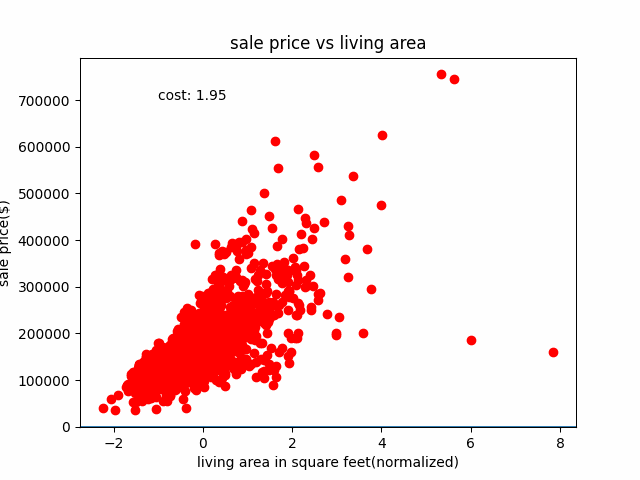

In [16]:
import io
import base64
from IPython.display import HTML
filename='animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))